# 과제 1 의사결정나무 Classifier

In [ ]:
import pandas as pd
import numpy as np

import matplotlib ; import matplotlib.pyplot as plt
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

#export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

#graphviz :나무 구조 시각화
from subprocess import call
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df_raw = pd.read_csv('./datasets/유방암.csv',encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [ ]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


In [ ]:
df_raw_dummy.isna().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis_음성               0
dtype: int64

- 결측치 확인 결과 이상없음

In [ ]:
# 데이터 분리 : 설명변수, 목표변수 구분ㅁ
df_raw_x = df_raw_dummy.drop("diagnosis_음성", axis = 1, inplace = False)
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [ ]:
df_raw_x = df_raw_dummy.drop(["diagnosis_음성"], axis = 1, inplace = False)
df_raw_y = df_raw_dummy["diagnosis_음성"]

In [ ]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [ ]:
df_raw_y.head()

0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

In [ ]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4 , random_state = 1234)

print("분할 전 설명변수 데이터 : ",df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 : Train (192, 30)  Test (128, 30)


In [ ]:
# SMOTE 기법 활용 : oversampling - 사전에 결측 처리, 더미 변환, 데이터 분할 작업 적용
from imblearn.over_sampling import SMOTE
# BAD 의 값 1 과 0 을 나누어 비율과 빈도 확인
print(df_raw_dummy.value_counts(["diagnosis_음성"]),"\n")
print("diagnosis_음성=0 비율 ", df_raw_dummy.value_counts(df_raw_dummy["diagnosis_음성"]==1)/len(df_raw_dummy))
# 오버샘플링 시각화
# plt.figure(figsize=(10,8))
# df_raw['color'] = np.where(df_raw["diagnosis_음성"]==1, "red", "blue")

# plt.scatter(df_raw['LOAN'], df_raw['VALUE'], c=df_raw['color'], s=30, alpha=0.5)
# plt.show()

diagnosis_음성
1               212
0               108
dtype: int64 

diagnosis_음성=0 비율  diagnosis_음성
True     0.6625
False    0.3375
dtype: float64


In [ ]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')
# train 데이터를 이용해 over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)
# 결과확인
print('Over-Sampling 전 :\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후  Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후  Train Y: {}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전 :
 1    115
0     77
Name: diagnosis_음성, dtype: int64 

Over-Sampling 후  Train X: (230, 30)
Over-Sampling 후  Train Y: (230,)

Over-Sampling 후 '1':115
Over-Sampling 후 '0':115


In [ ]:
# 데이터 결합
df_resampled = pd.concat([x_resampled,y_resampled], axis=1)
print(df_resampled.head())

# # 목표변수 산점도 확인
# plt.figure(figsize=(10,8))
# plt.scatter(df_resampled['LOAN'], df_resampled['VALUE'], c=df_resampled['BAD'], s=30, alpha = 0.5)
# plt.show()

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       13.150         15.34           85.31      538.9          0.09384   
1       15.750         19.22          107.10      758.6          0.12430   
2       20.640         17.35          134.80     1335.0          0.09446   
3       15.710         13.93          102.00      761.7          0.09462   
4        9.667         18.49           61.49      289.1          0.08946   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.08498         0.09293              0.03483         0.1822   
1           0.23640         0.29140              0.12420         0.2375   
2           0.10760         0.15270              0.08941         0.1571   
3           0.09462         0.07135              0.05933         0.1816   
4           0.06258         0.02948              0.01514         0.2238   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

In [ ]:
tree_uncust = DecisionTreeClassifier(random_state=1234)
tree_uncust.fit(df_train_x, df_train_y)
# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


- custum 되지않은 의사결정나무의 모델 정확도는 train 100% , test 93.2% 모델이 train 에서 과적합

In [ ]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [ ]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


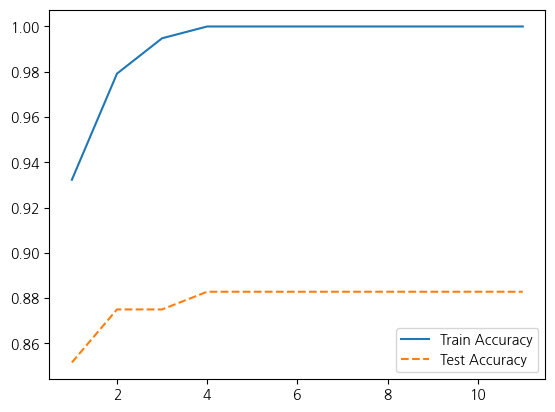

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 최대 깊이 증가에 따라 모델의 정확도는 증가함
- train / test 데이터에 따른 모델 성능 변화와 파라미터 특성 고려하여 depth = 4 선택
- 2 는 과소적합

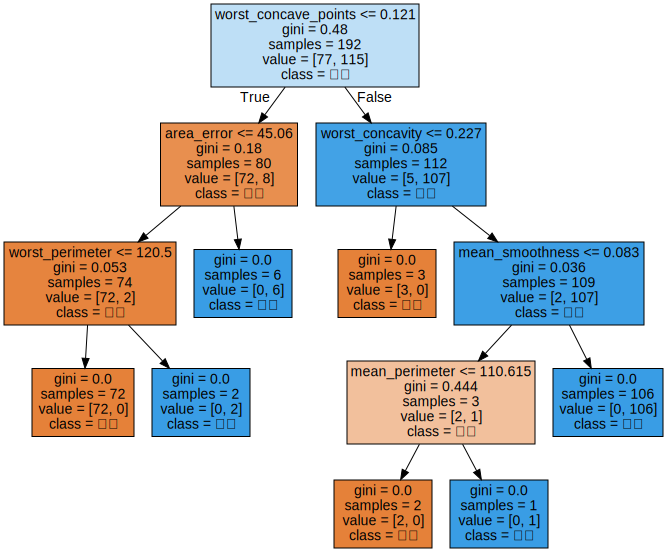

In [ ]:
# 변수명 저장하기
v_feature_name = df_train_x.columns
# max_depth 4 로 선택
tree = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree.fit(df_train_x, df_train_y)

export_graphviz(tree, out_file="tree.dot", class_names = ["양성", "음성"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# 의사결정트리 한눈에 보기
# call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])
# Image(filename='tree_low.png')

In [ ]:
# 참조: 적정 자료수 검토 : train Data 자료 수
print("전체 자료 = ", df_train_x.shape[0], "개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01, "개")
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy=[]

para_split = [n_split * 10 for n_split in range(1,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

전체 자료 =  192 개
전체 자료의 1% =  1.92 개


,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.875
1,20,0.995,0.875
2,30,0.995,0.875
3,40,0.995,0.875
4,50,0.995,0.875
5,60,0.995,0.875
6,70,0.995,0.875
7,80,0.984,0.867
8,90,0.953,0.844
9,100,0.953,0.844


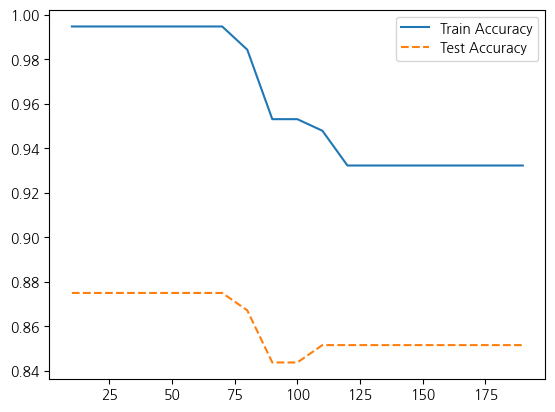

In [ ]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도 감소
- (train data)분리 노드 최소 자료수는 80 에서 성능 저하 이후 120 에서 크게 저하
- (test data)분리 노드 최소 자료수는 80 에서 성능이 저하되고 이후 미미한 상승 이후 큰 변화 없음
- 전체 자료수 및 파라미터 특징을 고려하여 minsamplesplit = 75 선택

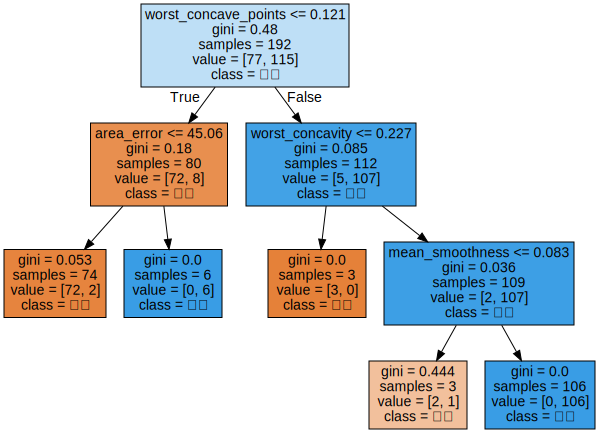

In [ ]:
# 분리 노드의 최소 자료수 75
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=75, random_state=1234)
tree.fit(df_train_x, df_train_y)

export_graphviz(tree, out_file="tree.dot", class_names=["양성", "음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
train_accuracy = []; test_accuracy=[]
# min_samples_leaf : 잎사귀 노드 최소 자료 수
para_leaf = [n_split *2 for n_split in range(1,23)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=75,
                                  max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.984,0.867
1,4,0.974,0.859
2,6,0.964,0.859
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.852
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


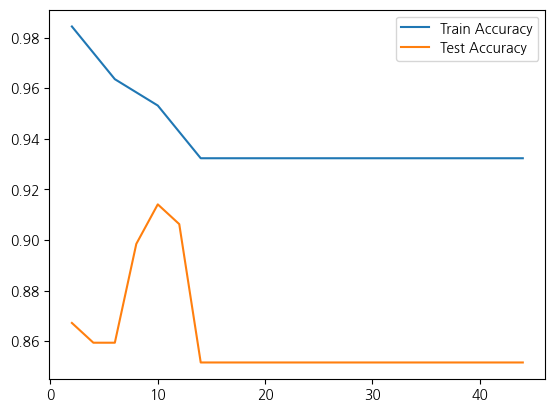

In [ ]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '-', label='Test Accuracy')
plt.legend()

- 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소함(train 기준, test 데이터는 변동이 심함)
- test 데이터는 잎사귀 노드 최소 자료수가 10 을 중심으로 큰 차이가 있음 최고 정확도를 나타내는 10 을 선택함
- 분리 노드의 최소 자료 수는 75 , 최대 깊이는 4

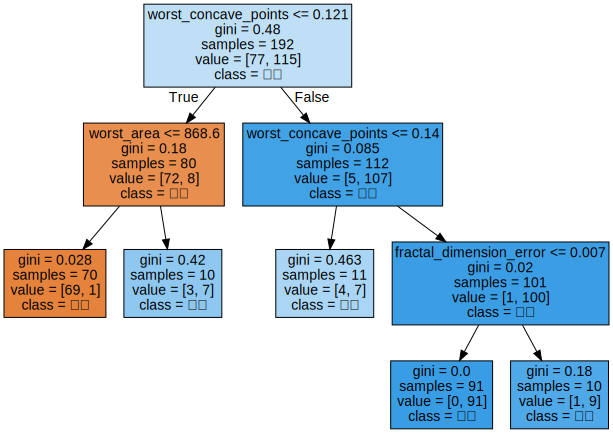

In [ ]:
#모델 파라미터 조정
tree = DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=75, max_depth = 4 , random_state=1234)
tree.fit(df_train_x, df_train_y)

export_graphviz(tree , out_file='tree.dot', class_names=['양성','음성'],feature_names = v_feature_name, impurity = True, filled=True)
# tree.dot 그리기
with open("tree.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

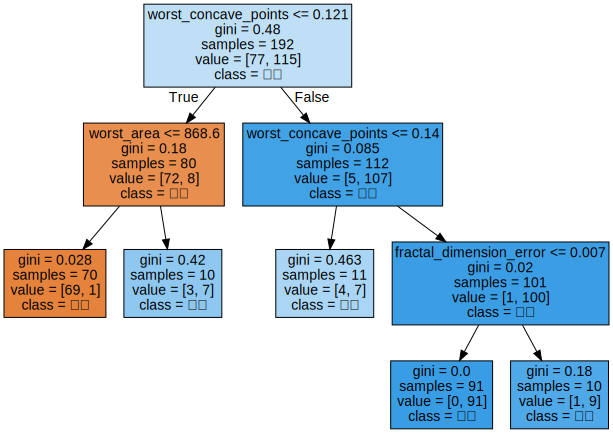

In [ ]:
# 최종 모델 시각화
tree_final = DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=75, max_depth = 4 , random_state=1234)
tree_final.fit(df_train_x, df_train_y)

export_graphviz(tree_final , out_file='tree_final.dot', class_names=['양성','음성'],feature_names = v_feature_name, impurity = True, filled=True)
# tree.dot 그리기
with open("tree.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 분리에 영향이 큰 변수 : worst_concave_points(평균 오목한 점의 수 중 큰 3개의 암세포), worst_area(평균 면적 중 제일 큰 3개의 암세포),
-                    등 분리 좌측(True) , 분리 우측(False)
- worst_concave_points <= 0.121 이면 True(자료 수 = 80, 양성 비율 증가)
- worst_concave_points > 0.121 이면 False(자료 수 = 112, 음성 비율 증가)
- 분리될수록 자식 노드 gini값은 대체로 감소 그러나 잎사귀 노드에서 gini지수가 증가도 함
- gini 지수는 데이터 불순도를 나타내는 지표로 낮을수록 분리가 쉽다는 특징이 있다.
- worst_concave_points > 0.121 & worst_concave_points > 0.14 & fracta_dimension_error 가 > 0.007 이면 음성 비율 100% 이다.

In [ ]:
y_pred = tree_final.predict(df_test_x)
print('Test Accuracy : ',tree_final.score(df_test_x, df_test_y))
print('Test Confusion matrix : \n',confusion_matrix(df_test_y, y_pred))

print(classification_report(df_test_y, y_pred, digits=3))

Test Accuracy :  0.9140625
Test Confusion matrix : 
 [[23  8]
 [ 3 94]]
              precision    recall  f1-score   support

           0      0.885     0.742     0.807        31
           1      0.922     0.969     0.945        97

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



- confusion matrix 결과
- TN = 23 , FP = 8 , FN 3 , TP = 94
- 정확도(Accuracy) = 117 / 128 = 0.914 -> test 데이터 기준 정분류율은 91.4%
- 정밀도(Precision) '1' 기준 f1-score = 94 / 102 = 92.15
- 재현율(Recall) = 94 / 97 = 96.9
- 특이도(Specificity) = 23 / 31 = 74.19 -> test 데이터 기준 음성 정분류율은 74.19%
- 실제 값을 잘 예측한다고 할 수 있다. 이는 오버샘플링을 제외한 분류로 차이가 있을 수 있다.

In [ ]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance']= tree_final.feature_importances_

# df_feature_importance 의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3).head(10)

,Feature,Importance
27,worst_concave_points,0.894
23,worst_area,0.104
19,fractal_dimension_error,0.002
0,mean_radius,0.000
1,mean_texture,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000
22,worst_perimeter,0.000


Text(0, 0.5, '설명변수')

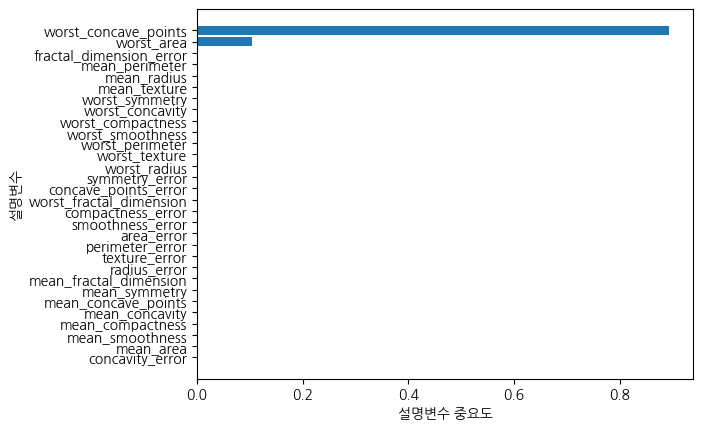

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace= True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

- 의사결정트리는 worst_concave_points 를 압도적으로 높은 영향을 준다고 나타냈다.
- 또한 worst_area 또한 미미한 영향력을 준다고 나타냈으며 이후 나오는 랜덤포레스트와는 다르게 적은 변수들에 대해 과대적합의 가능성이 있다.
- worst_concave_points가 중요하다고 나타났지만 일반화의 오류를 조심해야한다.

In [ ]:
df_train_x_over, df_test_x_over, df_train_y_over, df_test_y_over = train_test_split(
    x_resampled, y_resampled, test_size= 0.4, stratify=y_resampled, random_state=1234)
print('분할 전 데이터 현황 설명 : ', x_resampled.round(3), '목표 : ',y_resampled.shape)
print('분할 후 설명변수 현황 Train : ',df_train_x_over.round(3), 'Test : ',df_test_x_over.shape)
print('분할 후 목표변수 현황 Train : ',df_train_y_over.value_counts().round(3), 'Test : ',df_test_x_over.value_counts())

tree_final_over = DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=50, max_depth = 7 , random_state=1234)
tree_final_over.fit(df_train_x_over, df_train_y_over)

분할 전 데이터 현황 설명 :       mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0         13.150        15.340          85.310    538.900            0.094   
1         15.750        19.220         107.100    758.600            0.124   
2         20.640        17.350         134.800   1335.000            0.094   
3         15.710        13.930         102.000    761.700            0.095   
4          9.667        18.490          61.490    289.100            0.089   
..           ...           ...             ...        ...              ...   
225       12.365        14.504          78.404    470.826            0.084   
226        9.294        19.787          58.868    262.949            0.077   
227       12.768        16.912          82.621    495.838            0.110   
228        9.687        18.529          61.656    290.144            0.090   
229       12.258        16.736          78.297    463.288            0.082   

     mean_compactness  mean_concavity  mean_c

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=50,
                       random_state=1234)

- 오버샘플링 분할 데이터 보기

In [ ]:
# df_train_x_over, df_test_x_over, df_train_y_over, df_test_y_over = train_test_split(
#     x_resampled, y_resampled, test_size= 0.3, stratify=y_resampled, random_state=1234)
# print('분할 전 데이터 현황 설명 : ', x_resampled.shape, '목표 : ',y_resampled.shape)
# print('분할 후 설명변수 현황 Train : ',df_train_x_over.shape, 'Test : ',df_test_x_over.shape)
# print('분할 후 목표변수 현황 Train : ',df_train_y_over.value_counts(), 'Test : ',df_test_x_over.value_counts())

In [ ]:
# tree_final_over = DecisionTreeClassifier(min_samples_leaf=14, min_samples_split=50, max_depth = 7 , random_state=1234)
# tree_final_over.fit(df_train_x_over, df_train_y_over)

In [ ]:
# export_graphviz(tree_final_over , out_file='tree_final_over.dot', class_names=['Good','Bad'],feature_names = v_feature_name, impurity = True, filled=True)
# # tree_high.dot 그리기
# with open('tree_final_over.dot') as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [ ]:
# y_pred_over = tree_final_over.predict(df_test_x_over)
# print('Test Accuracy : ',tree_final_over.score(df_test_x_over, df_test_y_over))
# print('Test Confusion matrix : ',confusion_matrix(df_test_y_over, y_pred_over))

# print(classification_report(df_test_y_over , y_pred_over , digits=3))

In [ ]:
# df_importance = pd.DataFrame()
# df_importance['Feature'] = v_feature_name
# df_importance['Importance']= tree_final_over.feature_importances_

# # df_feature_importance 의 테이블을 중요도 순으로 정렬
# df_importance.sort_values("Importance",ascending=False, inplace=True)
# df_importance.round(3)

In [ ]:
# # 설명변수 중요도 그래프
# # 중요도가 높은 변수를 상위에 그림
# df_importance.sort_values('Importance', ascending=True, inplace= True)
# coordinates = range(len(df_importance))
# plt.barh(y= coordinates, width = df_importance['Importance'])
# plt.yticks(coordinates, df_importance['Feature'])
# plt.xlabel('설명변수 중요도')
# plt.ylabel('설명변수')

In [ ]:
# #p78
# #GridSearchCV 를 이용한 최적 parameter 찾기
# estimator = DecisionTreeClassifier()
# param_grid = {'max_depth':para_depth, "min_samples_split":para_split, 'min_samples_leaf' :para_leaf}
# grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy',n_jobs = -1)
# grid_dt.fit(df_train_x, df_train_y)

# print('best estimator model : ', grid_dt.best_estimator_)
# print('best parameter : ', grid_dt.best_params_)
# print('best score : ', grid_dt.best_score_.round(3))

# 과제 2 랜덤 포레스트 Classifier

In [ ]:
#데이터 구성
import pandas as pd

#데이터 시각화
import matplotlib ; import matplotlib.pyplot as plt
import matplotlib as mpl

#데이터 분할 : train, test
from sklearn.model_selection import train_test_split

#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

from statsmodels.api import Logit

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [46]:
#데이터 구성하기
df_raw = pd.read_csv('./datasets/유방암.csv',encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [48]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


- 더미 변수 생성

### 결측치 확인

In [49]:
df_raw_dummy.isna().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis_음성               0
dtype: int64

- 결측치 확인 결과 이상없음

### 데이터 전처리

In [50]:
# 데이터 분리 : 설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("diagnosis_음성", axis = 1, inplace = False)
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [51]:
df_raw_x = df_raw_dummy.drop(["diagnosis_음성"], axis = 1, inplace = False)
df_raw_y = df_raw_dummy["diagnosis_음성"]

In [52]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [53]:
df_raw_y.head()

0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

In [54]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4 , random_state = 1234)

print("분할 전 설명변수 데이터 : ",df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 : Train (192, 30)  Test (128, 30)


In [55]:
print(df_raw_dummy.value_counts(["diagnosis_음성"]),"\n")
print("diagnosis_음성=0 비율 ", df_raw_dummy.value_counts(df_raw_dummy["diagnosis_음성"]==1)/len(df_raw_dummy))

diagnosis_음성
1               212
0               108
dtype: int64 

diagnosis_음성=0 비율  diagnosis_음성
True     0.6625
False    0.3375
dtype: float64


### uncustomed 랜덤 포레스트 모델 생성

In [56]:
#랜덤 포레스트 모델 생성 
rf_uncust = RandomForestClassifier(random_state=1234)
rf_uncust.fit(df_train_x, df_train_y)

#train 모델 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))

#test 모델 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.914


- custum 되지않은 랜덤포레스트의 모델 정확도는 train 100% , test 91.4% 모델이 train 에서 과적합

In [57]:
# 생성된 모델의 옵션 확인

print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


- custum 되지않은 랜덤포레스트의 모델 옵션 확인

### 트리 수 변경에 따른 n_estimators 확인

In [58]:
#모델 parameter 조정- n_estimators: 트리 수 변경에 따른 모델 성능

#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

#n_estimators: 트리 수 변경 : 1~150
para_n_tree = [n_tree * 10 for n_tree in range(1,15)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
#데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,1.000,0.914
2,30,1.000,0.906
3,40,1.000,0.906
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.914


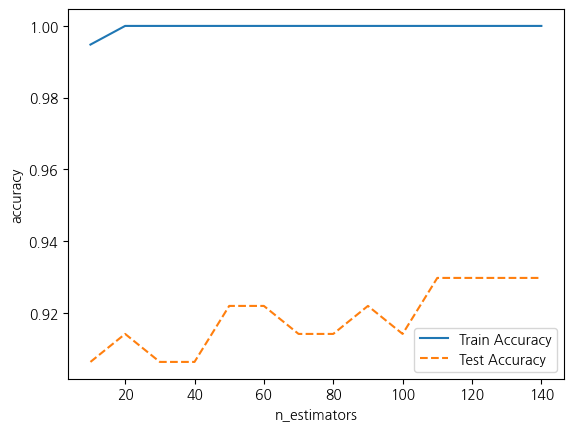

In [59]:
#모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators");plt.ylabel("accuracy")
plt.legend()

- n_estimators 는 110 에서 test 데이터의 최대 성능
- 전체 자료와 특성값을 고려하여 n_estimators = 110을 선택함

### 트리수 변경에 의한 oob error 확인

In [60]:
#n_estimators: 트리 수 변경에 따른 모델 oob error 변화
oob_error=[]

for v_n_estimators in range(5,121):
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

C:\Users\winju\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\winju\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\winju\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\winju\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\winju\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably me

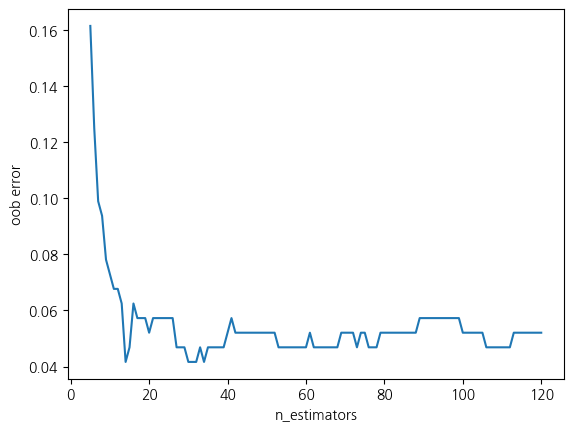

In [61]:
#그래프로 표현
plt.plot(range(5,121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

#트리 수 지정
n_estimators = 110

- n_estimators 가 110 에서 oob error 가 작아지는 것을 확인

In [62]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=100 , random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.953,0.922
1,2,0.974,0.906
2,3,0.990,0.906
3,4,1.000,0.914
4,5,1.000,0.914
5,6,1.000,0.914
6,7,1.000,0.914
7,8,1.000,0.914
8,9,1.000,0.914
9,10,1.000,0.914


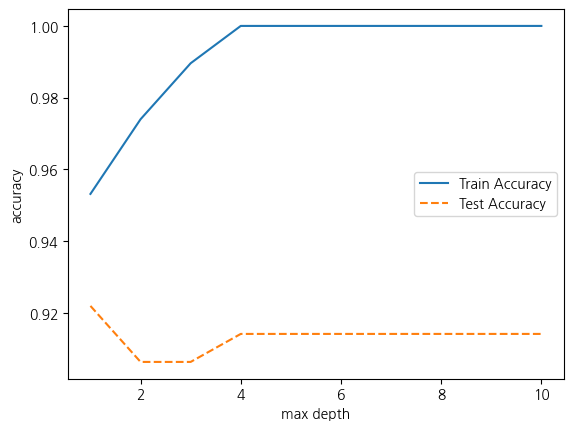

In [63]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()

- 최대 깊이 증가에 따라 모델의 정확도는 증가함
- train / test 데이터에 따른 모델 성능 변화와 파라미터 특성 고려하여 depth = 6 을 선택함
- 2 는 과소적합

### 분리 노드 최소 자료 수(MinSamplesSplit) 확인

In [64]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split ,max_depth = 6 , n_estimators=110 , random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,0.984,0.906
2,30,0.984,0.914
3,40,0.984,0.906
4,50,0.979,0.898
5,60,0.964,0.883
6,70,0.948,0.891
7,80,0.948,0.914
8,90,0.948,0.914
9,100,0.948,0.914


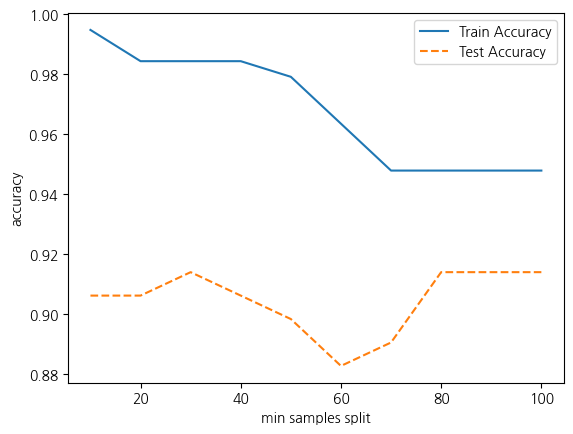

In [65]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 정확도는 이후 증가, 감소 함
- train / test 데이터에 따른 모델 성능 변화와 파라미터 특성 고려하여 minsamplessplit = 30 을 선택함
- minsamplessplit = 60 에서 test 데이터 성능이 많이 낮아짐

### 잎사귀 노드의 최소 자료 수 확인

In [66]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf ,max_depth = 6 , n_estimators=110 , random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.984,0.906
1,10,0.974,0.906
2,15,0.969,0.906
3,20,0.969,0.906
4,25,0.958,0.906
5,30,0.969,0.898
6,35,0.953,0.898
7,40,0.948,0.906
8,45,0.948,0.906
9,50,0.964,0.914


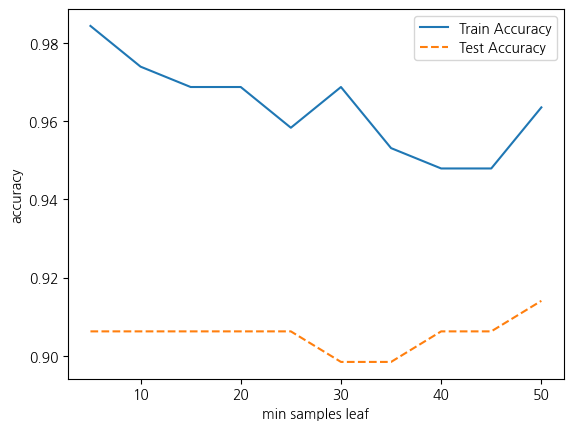

In [67]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel('min samples leaf'); plt.ylabel('accuracy')
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 정확도는 이후 증가, 감소 함
- train / test 데이터에 따른 모델 성능 변화와 파라미터 특성 고려하여 minsamplesleaf = 25 을 선택함
- minsamplesleaf = 30 에서 test 데이터 성능이 낮아짐

In [68]:
rf_final=RandomForestClassifier(min_samples_leaf=25, min_samples_split=30 ,max_depth=6,n_estimators=110,random_state=1234)
rf_final.fit(df_train_x,df_train_y)
y_pred=rf_final.predict(df_test_x)

print('Accuracy on training set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))

print('Accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))

print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:0.958
Accuracy on test set:0.906
Confusion matrix:
[[25  6]
 [ 6 91]]
              precision    recall  f1-score   support

           0      0.806     0.806     0.806        31
           1      0.938     0.938     0.938        97

    accuracy                          0.906       128
   macro avg      0.872     0.872     0.872       128
weighted avg      0.906     0.906     0.906       128



- confusion matrix 결과
- TN = 25 , FP = 6 , FN = 6 , TP = 91
- 정확도(Accuracy) = (TP+TN)/(TP+FP+FN+TN) = 0.906 으로 정분류율이 90.6% 이다.
- 정밀도(Precision) '1' 기준 f1-score = TP/(TP+FP) = 0.938
- 재현율(Recall) = TP/(TP+FN) = 0.938
- 특이도(Specificity) = TN/(TN+FP) = 0.806
- 즉, 실제 값을 잘 예측한다고 할 수 있다. 이는 오버샘플링을 제외한 분류로 차이가 있을 수 있다

In [69]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3).head(20)

,Feature,Importance
22,worst_perimeter,0.160
7,mean_concave_points,0.155
6,mean_concavity,0.128
27,worst_concave_points,0.126
20,worst_radius,0.088
23,worst_area,0.073
26,worst_concavity,0.066
2,mean_perimeter,0.059
0,mean_radius,0.036
3,mean_area,0.033


Text(0, 0.5, '설명변수')

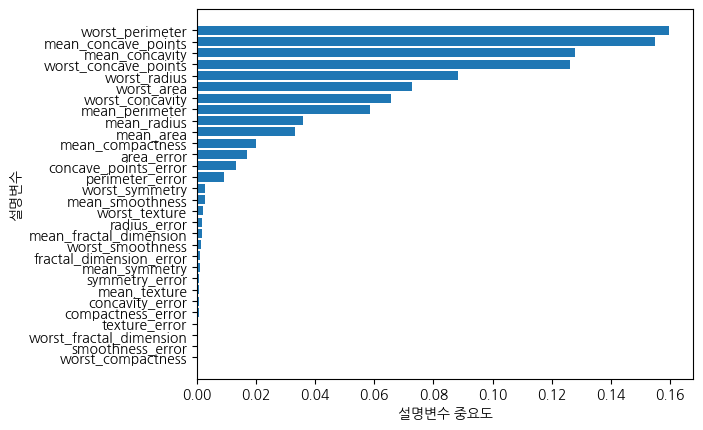

In [70]:

df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

- 설명변수 중요도 RandomForest 모델 확인결과 worst_perimeter, mean_concave_points, mean_concavity, worst_concave_points 순으로 중요도를 나타냈다.
- 랜덤포레스트는 의사결정트리와 다르게 여러 결정 트리를 생성하고 그 결과를 결합하여 최종 모델을 형성한 특징으로 변수들에 대한 영향에 대체적인 연관성을 나타냈다
- 즉 , 일반 의사결정트리와 다르게 worst_perimeter 등등 여러 변수들에 대해 영향을 나타냈다.

In [71]:
estimator=RandomForestClassifier(n_estimators=110,random_state=1234)

param_grid={'max_depth':para_depth,'min_samples_leaf':para_leaf}

grid_rf=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_rf.fit(df_train_x,df_train_y)
print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
print('\nbest score:\n{}'.format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(max_depth=1, min_samples_leaf=5, n_estimators=110,
                       random_state=1234)

best parameter:
{'max_depth': 1, 'min_samples_leaf': 5}

best score:
0.948
